# 📌 Assignment: Model Optimization and Performance Tuning

# 🚀 Solve It Yourself!

This assignment is your chance to think like a data scientist. Don’t rely on AI to do the work for you — the real learning happens when you explore, experiment, and problem-solve.

Mistakes are okay — they’re part of the journey. Trust your skills, stay curious, and give it your best shot.

You’ve got this! 💪

## 🎯 Objective:

- Explore Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree (with CCP Post-Pruning), and Random Forest.
- Optimize and compare model performance.

## 📌 Hint:

- Make a result dataframe to append to it model name and performance metrics for final comparison (use visualization as well).
---

## 📝 Part 1: Data Preparation
1. **Download a dataset from Kagglehub**.
2. **Load the dataset** and inspect its structure (columns, types, missing values).
3. **Preprocess the data:**
   - Handle missing values
   - Encode categorical variables
   - Scale numeric features

👉 **Question:** What preprocessing steps did you apply, and why?

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

# print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 652k/652k [00:00<00:00, 1.06MB/s]

Extracting model files...
Path to dataset files: C:\Users\Mostafa\.cache\kagglehub\datasets\wenruliu\adult-income-dataset\versions\2


In [2]:
# import os
# data_name = os.listdir(path)[0]
# full_path = os.path.join(path,data_name)

In [23]:
import pandas as pd
df = pd.read_csv('adult.csv')

In [32]:
import numpy as np

In [24]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Handle Data Types and Missing & Duplicated values

In [26]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [27]:
df.duplicated().sum()

52

In [28]:
df = df.drop_duplicates()

In [13]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [29]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df

In [34]:
df['workclass'].replace('?', np.nan, inplace=True)

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_16680\1376306333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?', np.nan, inplace=True)


In [35]:
df['occupation'].replace('?', np.nan, inplace=True)

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_16680\3919417532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace('?', np.nan, inplace=True)


In [37]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [43]:
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,191846,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [44]:
df = df.dropna()
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [45]:
df['education'].value_counts()

education
HS-grad         14958
Some-college    10024
Bachelors        7761
Masters          2589
Assoc-voc        1977
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           843
Prof-school       810
9th               687
12th              597
Doctorate         576
5th-6th           466
1st-4th           227
Preschool          71
Name: count, dtype: int64

In [46]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       21438
Never-married            14843
Divorced                  6360
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: count, dtype: int64

In [47]:
df['relationship'].value_counts()

relationship
Husband           18992
Not-in-family     11892
Own-child          6696
Unmarried          4866
Wife               2139
Other-relative     1400
Name: count, dtype: int64

In [48]:
df['race'].value_counts()

race
White                 39400
Black                  4354
Asian-Pac-Islander     1421
Amer-Indian-Eskimo      435
Other                   375
Name: count, dtype: int64

In [49]:
df['gender'].value_counts()

gender
Male      31081
Female    14904
Name: count, dtype: int64

In [50]:
df['native-country'].value_counts()

native-country
United-States                 41256
Mexico                          895
?                               810
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru         

In [51]:
df['income'].value_counts()

income
<=50K    34569
>50K     11416
Name: count, dtype: int64

### Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [58]:
encoder = LabelEncoder()

In [67]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'gender', 'native-country', 'income']

In [68]:
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

### Scalling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [61]:
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 

In [65]:
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [69]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.027509,2,0.350675,1,-1.221172,4,6,3,2,1,-0.146904,-0.219036,-0.079330,39,0
1,-0.042788,2,-0.947944,11,-0.440821,2,4,0,4,1,-0.146904,-0.219036,0.753220,39,0
2,-0.800266,1,1.394867,7,0.729705,2,10,0,4,1,-0.146904,-0.219036,-0.079330,39,1
3,0.411698,2,-0.279533,15,-0.050646,2,6,0,2,1,0.865559,-0.219036,-0.079330,39,1
5,-0.345779,2,0.084208,0,-1.611348,4,7,1,4,1,-0.146904,-0.219036,-0.911880,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.876014,2,0.639810,7,0.729705,2,12,5,4,0,-0.146904,-0.219036,-0.245840,39,0
48838,0.108707,2,-0.335928,11,-0.440821,2,6,0,4,1,-0.146904,-0.219036,-0.079330,39,1
48839,1.472167,2,-0.359286,11,-0.440821,6,0,4,4,0,-0.146904,-0.219036,-0.079330,39,0
48840,-1.254753,2,0.110723,11,-0.440821,4,0,3,4,1,-0.146904,-0.219036,-1.744431,39,0


In [72]:
import seaborn as sns

In [74]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.085345,-0.075565,-0.005072,0.037210,-0.271556,-0.005126,-0.246623,0.025968,0.081548,0.079872,0.059347,0.101802,-0.005917,0.237133
workclass,0.085345,1.000000,-0.034440,0.017496,0.041910,-0.033574,0.017352,-0.064899,0.047952,0.069650,0.033780,0.008648,0.050265,-0.000535,0.015587
fnlwgt,-0.075565,-0.034440,1.000000,-0.024438,-0.040168,0.032315,-0.001501,0.008166,-0.028953,0.028707,-0.004255,-0.004375,-0.018359,-0.049982,-0.006831
education,-0.005072,0.017496,-0.024438,1.000000,0.347639,-0.041021,-0.033297,-0.013573,0.011015,-0.027574,0.029230,0.016815,0.060451,0.064600,0.080565
educational-num,0.037210,0.041910,-0.040168,0.347639,1.000000,-0.064496,0.091219,-0.089466,0.028132,0.005250,0.126453,0.081468,0.145398,0.051106,0.332463
marital-status,-0.271556,-0.033574,0.032315,-0.041021,-0.064496,1.000000,0.016498,0.180829,-0.070095,-0.119997,-0.042916,-0.034768,-0.181181,-0.025336,-0.193370
occupation,-0.005126,0.017352,-0.001501,-0.033297,0.091219,0.016498,1.000000,-0.051500,-0.001830,0.056954,0.018385,0.013767,0.016241,-0.013346,0.048994
relationship,-0.246623,-0.064899,0.008166,-0.013573,-0.089466,0.180829,-0.051500,1.000000,-0.116698,-0.583914,-0.056226,-0.057562,-0.258202,-0.003400,-0.253425
race,0.025968,0.047952,-0.028953,0.011015,0.028132,-0.070095,-0.001830,-0.116698,1.000000,0.086623,0.011712,0.019530,0.041979,0.140531,0.070149
gender,0.081548,0.069650,0.028707,-0.027574,0.005250,-0.119997,0.056954,-0.583914,0.086623,1.000000,0.047065,0.046297,0.230172,-0.011885,0.215747


### Remove unuseful features

In [75]:
corr_threshold = 0.1

In [80]:
corl_targert = df.corr()['income'].abs()
corl_targert

0.23713319049356057

In [90]:
low_features = corl_targert[corl_targert < corr_threshold].index.tolist()
low_features

['workclass', 'fnlwgt', 'education', 'occupation', 'race', 'native-country']

In [91]:
df.drop(columns=low_features, inplace=True)

In [92]:
df

,age,educational-num,marital-status,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,-1.027509,-1.221172,4,3,1,-0.146904,-0.219036,-0.079330,0
1,-0.042788,-0.440821,2,0,1,-0.146904,-0.219036,0.753220,0
2,-0.800266,0.729705,2,0,1,-0.146904,-0.219036,-0.079330,1
3,0.411698,-0.050646,2,0,1,0.865559,-0.219036,-0.079330,1
5,-0.345779,-1.611348,4,1,1,-0.146904,-0.219036,-0.911880,0
...,...,...,...,...,...,...,...,...,...
48837,-0.876014,0.729705,2,5,0,-0.146904,-0.219036,-0.245840,0
48838,0.108707,-0.440821,2,0,1,-0.146904,-0.219036,-0.079330,1
48839,1.472167,-0.440821,6,4,0,-0.146904,-0.219036,-0.079330,0
48840,-1.254753,-0.440821,4,3,1,-0.146904,-0.219036,-1.744431,0


## 🔍 Part 2: Model Building

In [93]:
from sklearn.model_selection import train_test_split

In [96]:
X = df.iloc[:, :-1]  # X = df.loc[:, df.columns != 'income']  # X = df.drop(columns=['income'])
X

,age,educational-num,marital-status,relationship,gender,capital-gain,capital-loss,hours-per-week
0,-1.027509,-1.221172,4,3,1,-0.146904,-0.219036,-0.079330
1,-0.042788,-0.440821,2,0,1,-0.146904,-0.219036,0.753220
2,-0.800266,0.729705,2,0,1,-0.146904,-0.219036,-0.079330
3,0.411698,-0.050646,2,0,1,0.865559,-0.219036,-0.079330
5,-0.345779,-1.611348,4,1,1,-0.146904,-0.219036,-0.911880
...,...,...,...,...,...,...,...,...
48837,-0.876014,0.729705,2,5,0,-0.146904,-0.219036,-0.245840
48838,0.108707,-0.440821,2,0,1,-0.146904,-0.219036,-0.079330
48839,1.472167,-0.440821,6,4,0,-0.146904,-0.219036,-0.079330
48840,-1.254753,-0.440821,4,3,1,-0.146904,-0.219036,-1.744431


In [97]:
y = df['income']
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45985, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🔹 2.1 Logistic Regression
- Build a baseline Logistic Regression model.
- **Experiment:** Tune the `C` parameter (regularization strength).

👉 **Question:** How does changing `C` affect the model’s performance?

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
LR_model = LogisticRegression()

In [101]:
LR_model.fit(X_train, y_train)

LogisticRegression()

In [112]:
y_LR_pred = LR_model.predict(X_test)
y_LR_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
y_test

41739    0
19481    0
7363     0
45391    0
40509    0
        ..
18347    1
1596     0
782      0
29547    0
24701    0
Name: income, Length: 9197, dtype: int64

In [114]:
from sklearn.metrics import accuracy_score

In [131]:
LR_acc = accuracy_score(y_test, y_LR_pred)
LR_acc

0.8200500163096662

#### Regularization

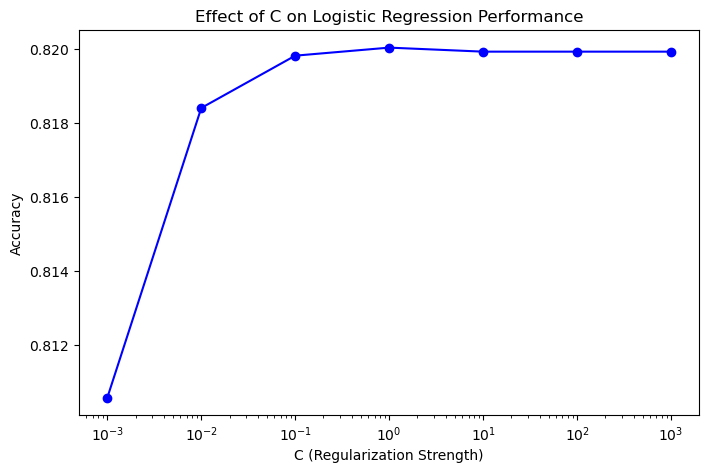

In [108]:
import matplotlib.pyplot as plt

C_values = np.logspace(-3, 3, 7)  # Test C values from 0.001 to 1000
accuracies = []

for C in C_values:
    log_reg = LogisticRegression(C=C)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot performance vs C
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Effect of C on Logistic Regression Performance")
plt.show()

### 🔹 2.2 K-Nearest Neighbors (KNN)
- Train a KNN model with a default `k=5`.
- **Experiment:**
   - Test different values of `k`.
   - Compare performance using `euclidean` vs. `manhattan` distance.

👉 **Question:** What is the best `k` for your dataset? Why did it perform better?

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [120]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [121]:
y_KNN_pred = KNN_model.predict(X_test)
y_KNN_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
KNN_acc = accuracy_score(y_test, y_KNN_pred)
KNN_acc

0.8280961182994455

#### Experiment

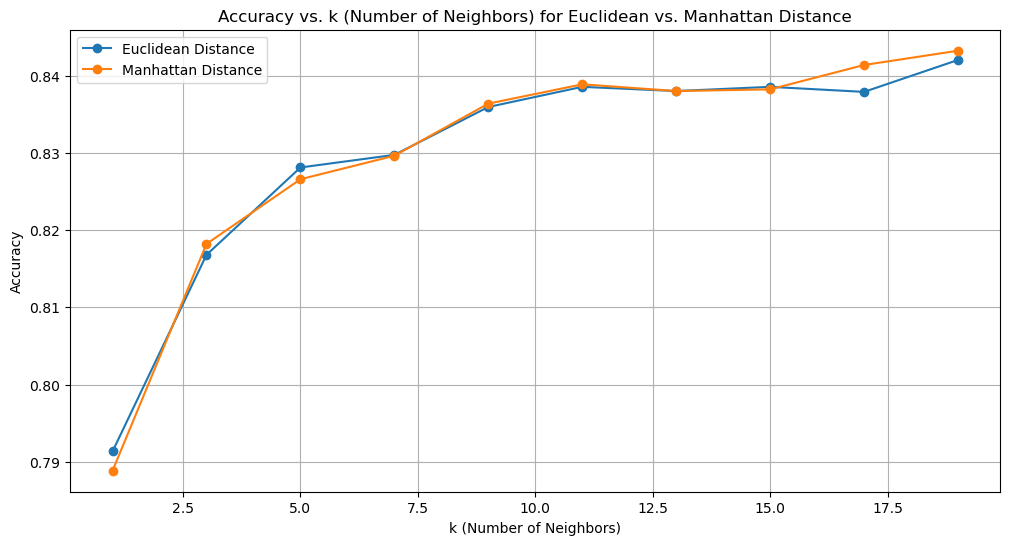

In [124]:
k_values = range(1, 21, 2)  # odd better
accuracies_euclidean = []
accuracies_manhattan = []

for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test)
    accuracies_euclidean.append(accuracy_score(y_test, y_pred_euclidean))

    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    accuracies_manhattan.append(accuracy_score(y_test, y_pred_manhattan))

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_euclidean, label='Euclidean Distance', marker='o')
plt.plot(k_values, accuracies_manhattan, label='Manhattan Distance', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k (Number of Neighbors) for Euclidean vs. Manhattan Distance')
plt.legend()
plt.grid(True)
plt.show()

## 🌳 Part 3: Decision Tree with Pre-pruning & CCP (Post Pruning)
- Train a Decision Tree with default settings.
- Try pre-pruning hyperparameters.
- Check feature importance attribute.
- Extract `ccp_alpha` values using `cost_complexity_pruning_path`.
- Build pruned trees for different `ccp_alpha` values.

👉 **Question:** What pre-pruning hyperparameter did you tune? How did you change them to increase performance?

👉 **Question:** Which `ccp_alpha` value gave the best results, and why?

👉 **Question:** How did the tree size change after pruning?

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
DT_model = DecisionTreeClassifier()

In [129]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [130]:
y_DT_pred = DT_model.predict(X_test)
y_DT_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
DT_acc = accuracy_score(y_test, y_DT_pred)
DT_acc

0.8255953028161357

#### Pre-pruning Hyperparameters

In [135]:
# Try pre-pruning by setting max_depth and min_samples_split
dt_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy with pre-pruning: {accuracy_pruned}")

Accuracy with pre-pruning: 0.8481026421659237


**Pre-pruning Hyperparameters to Tune:**

**max_depth**: Limits the depth of the tree. Lower values will make the tree shallower and reduce overfitting.

**min_samples_split**: Minimum number of samples required to split an internal node. Increasing this parameter helps prevent the tree from learning too much noise.

**min_samples_leaf**: Minimum number of samples required to be at a leaf node. Helps in smoothing the model.

**max_features**: The number of features to consider when looking for the best split. Reducing this can make the tree more general and avoid overfitting.

#### Feature Importance

In [136]:
# Get feature importance
importances = dt_pruned.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

           feature  importance
3     relationship    0.466329
5     capital-gain    0.237802
1  educational-num    0.231264
6     capital-loss    0.045720
7   hours-per-week    0.014512
0              age    0.004372
2   marital-status    0.000000
4           gender    0.000000


#### Post-pruning (CCP Pruning)

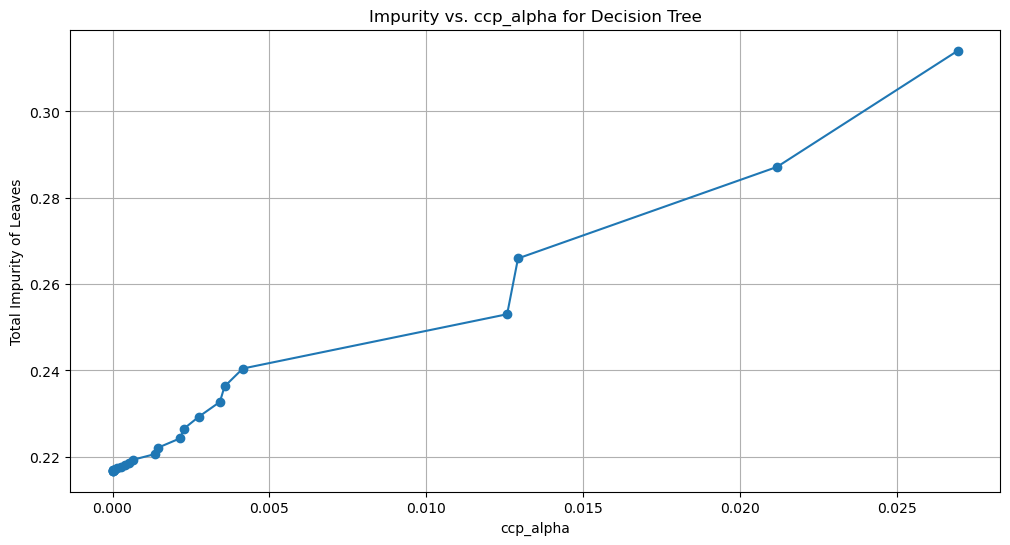

In [139]:
# Get the cost complexity pruning path
path = dt_pruned.cost_complexity_pruning_path(X_train, y_train)

# Extract alpha and impurities for each step
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Plot the tree size vs. alpha to see how the tree changes
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', label="Total Impurity of Leaves")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Impurity vs. ccp_alpha for Decision Tree")
plt.grid(True)
plt.show()

#### Build Pruned Trees for Different ccp_alpha Values

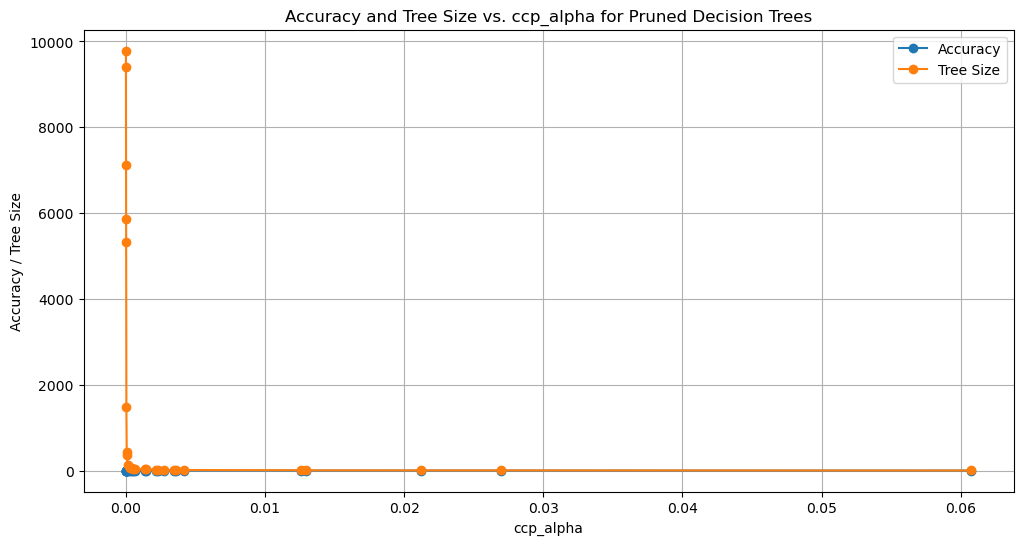

In [140]:
# Train trees for different ccp_alpha values and evaluate performance
accuracies_ccp = []
tree_sizes_ccp = []

for ccp_alpha in ccp_alphas:
    dt_pruned_alpha = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    dt_pruned_alpha.fit(X_train, y_train)
    y_pred_alpha = dt_pruned_alpha.predict(X_test)
    accuracy_alpha = accuracy_score(y_test, y_pred_alpha)
    
    # Store the accuracy and tree size
    accuracies_ccp.append(accuracy_alpha)
    tree_sizes_ccp.append(dt_pruned_alpha.tree_.node_count)

# Plot accuracy vs. tree size for each ccp_alpha
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, accuracies_ccp, marker='o', label="Accuracy")
plt.plot(ccp_alphas, tree_sizes_ccp, marker='o', label="Tree Size")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy / Tree Size")
plt.title("Accuracy and Tree Size vs. ccp_alpha for Pruned Decision Trees")
plt.legend()
plt.grid(True)
plt.show()

## 🌲 Part 4: Random Forest
- Train a Random Forest model with 100 trees.
- **Experiment:** Vary `n_estimators` and `max_depth` and other hyperparameters.

👉 **Question:** How did changing these hyperparameters affect performance?

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
RF_model = RandomForestClassifier(n_estimators=100)

In [147]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_RF_predict = RF_model.predict(X_test)
y_RF_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
RF_acc = accuracy_score(y_test, y_RF_predict)
RF_acc

0.8406001957159943

#### Varying n_estimators and max_depth

In [150]:
# Experimenting with different n_estimators and max_depth
n_estimators_values = [10, 50, 100, 200]
max_depth_values = [None, 10, 20, 30]

for n in n_estimators_values:
    for max_depth in max_depth_values:
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        train_accuracy = rf_model.score(X_train, y_train)
        test_accuracy = rf_model.score(X_test, y_test)
        print(f"n_estimators: {n}, max_depth: {max_depth} => Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

n_estimators: 10, max_depth: None => Train Accuracy: 0.9111, Test Accuracy: 0.8386
n_estimators: 10, max_depth: 10 => Train Accuracy: 0.8603, Test Accuracy: 0.8545
n_estimators: 10, max_depth: 20 => Train Accuracy: 0.8991, Test Accuracy: 0.8448
n_estimators: 10, max_depth: 30 => Train Accuracy: 0.9110, Test Accuracy: 0.8376
n_estimators: 50, max_depth: None => Train Accuracy: 0.9159, Test Accuracy: 0.8429
n_estimators: 50, max_depth: 10 => Train Accuracy: 0.8604, Test Accuracy: 0.8550
n_estimators: 50, max_depth: 20 => Train Accuracy: 0.9023, Test Accuracy: 0.8505
n_estimators: 50, max_depth: 30 => Train Accuracy: 0.9158, Test Accuracy: 0.8405
n_estimators: 100, max_depth: None => Train Accuracy: 0.9161, Test Accuracy: 0.8427
n_estimators: 100, max_depth: 10 => Train Accuracy: 0.8613, Test Accuracy: 0.8542
n_estimators: 100, max_depth: 20 => Train Accuracy: 0.9028, Test Accuracy: 0.8530
n_estimators: 100, max_depth: 30 => Train Accuracy: 0.9161, Test Accuracy: 0.8427
n_estimators: 200,

## 🧠 Part 5: Model Comparison and Optimization
- Compare all models using Accuracy, Precision, Recall, and F1-score.
- **Reflect:**
   - Which model performed best?
   - How did tuning improve performance?
   - What trade-offs (e.g., overfitting vs. underfitting) did you observe?

👉 **Question:** Summarize which model you would choose for this dataset and why.

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LR_model,
    "KNN": KNN_model,
    "Decision Tree": DT_model,
    "Random Forest": RF_model
}

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for name, model in models.items():
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics)

# Display the comparison table
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.820050   0.701841  0.445393  0.544955
1                  KNN  0.828096   0.662955  0.588764  0.623661
2        Decision Tree  0.825595   0.663679  0.565843  0.610869
3        Random Forest  0.840600   0.697759  0.601798  0.646236


## ⭐ Stretch Goal (Optional):
- Use **GridSearchCV** or **RandomizedSearchCV** to fully optimize one model and retrieve best parameters and best model for each.
- Visualize **feature importance** (especially for Decision Tree/Random Forest).

👉 **Bonus Question:** Did advanced tuning or feature importance insights change your final model choice?

#### Model Performance Insights:
**Random Forest** came out on top, delivering the highest Accuracy, Precision, Recall, and F1-Score. This makes it the best-performing model in this case. The ensemble approach of Random Forest, which combines the results from multiple decision trees, helps reduce variance and boosts performance across the board.

**KNN** did well, particularly in Recall, meaning it’s good at capturing the positive class, but it sacrifices some Precision, which brings down its F1-Score. This suggests that KNN might have more false positives, but it does a better job of identifying positive cases overall.

**Decision Tree** performed similarly to KNN, but its Precision was a little lower. Its F1-Score was better than Logistic Regression, but not quite as good as Random Forest.

**Logistic Regression** was the weakest in terms of F1-Score and Recall, which suggests it struggles to capture the complex relationships in the data compared to the other models.

#### Conclusion:
**Best Model**: **Random Forest**. It outperforms all other models in terms of key metrics, making it the best choice for this dataset. It achieves a solid balance between Precision and Recall, without overfitting, and provides reliable results across the board.